In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Path of the file to read, 
# I solved the task on Kaggle, so you might want to provide the path to train.csv on your local machine to load the notebook correctly.
train_filepath = "../input/tabular-playground-series-apr-2021/train.csv"

df = pd.read_csv(train_filepath, index_col="PassengerId")

print("Finished setup, dataset is available")

Finished setup, dataset is available


# Context

Let's get a quick look into the context of the data set that we are planning to explore.

In [2]:
# We can have a look on first five rows in the dataframe
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
# Let's also check last five rows in the dataframe
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S
99999,0,3,"Enciso, Tyler",male,55.0,0,0,458074,13.96,NaN,S


## What do the different columns mean

The following information is taken from the competition description and will give us some extra understanding what different columns represent and what values (keys) are expected in them.

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival |                  Survival                  |                 0 = No, 1 = Yes                |
|  pclass  |                Ticket class                |            1 = 1st, 2 = 2nd, 3 = 3rd           |
|    sex   |                     Sex                    |                                                |
|    Age   |                Age in years                |                                                |
|   sibsp  | # of siblings / spouses aboard the Titanic |                                                |
|   parch  | # of parents / children aboard the Titanic |                                                |
|  ticket  |                Ticket number               |                                                |
|   fare   |               Passenger fare               |                                                |
|   cabin  |                Cabin number                |                                                |
| embarked |             Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |

# Data quality assessment

We start some simple assesments and will use the guidance from the following tutorial cheat sheet: https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md

## Let's also get some overall info from Pandas about this dataframe

We start by gathering information about values in each numerical column by using **.describe()** function of pandas.

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


Now let's have a look into the columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


As we can see there are 10 000 entries in the dataset, and some columns contain NaNs. Let's get some visualisations for the columns with NaNs/null values so we have an overall understanding how bad data is in these columns.

### Let's start by investigating total count of NaN values in each column where not only non-nulls are present.

<AxesSubplot:xlabel='Name', ylabel='Nullable data'>

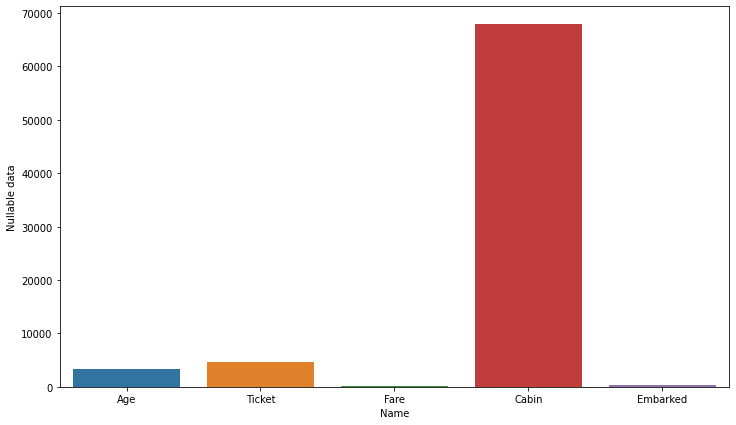

In [6]:
total = df.shape[0]

age_nan_number = df['Age'].isna().sum()
ticket_nan_number = df['Ticket'].isna().sum()
fare_nan_number = df['Fare'].isna().sum()
cabin_nan_number = df['Cabin'].isna().sum()
embarked_nan_number = df['Embarked'].isna().sum()

name_of_nan_contains_columns = ['Age', 'Ticket', 'Fare', 'Cabin', 'Embarked']
list_nans = [age_nan_number, ticket_nan_number, fare_nan_number,cabin_nan_number, embarked_nan_number]
list_value = [total - age_nan_number, total - ticket_nan_number, total - fare_nan_number, total - cabin_nan_number, total - embarked_nan_number]
df_nans = pd.DataFrame(list(zip(name_of_nan_contains_columns, list_nans, list_value)), columns =['Name','Nullable data', 'Non-empty data'])
plt.figure(figsize=(12,7))
sns.barplot(x='Name', y='Nullable data', data=df_nans)

Number of NaN values is extremely high for Cabin column (close to 70%), therefore we will remove this column from the dataset.

In [7]:
df.drop(columns="Cabin", axis=1, inplace=True)

## Duplicates
Full duplicates are not really valuable in the context of passenger/survivors, since each person is unique in real-world context, therefore duplicates can be safely deleted.

In [8]:
df = df.drop_duplicates()
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,S
...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,S


Since no rows are dropped, we conclude that there are no duplicates in the dataframe.

## Random sample checks
Finally, we can run **df.sample()** in Pandas and try to spot something interesting in the random samples of data.

> Note, since when the command returns a new sample everytime it is run, I will describe anything interesting in the Markdown section below.

In [9]:
df.sample(10).sort_values(by=['Name'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
63296,0,3,"Castor, James",male,19.0,1,0,226132,271.26,C
5472,0,3,"Gaudet, Otto",male,55.0,0,0,25651,7.30,C
50455,0,2,"Gilbert, Alfredo",male,0.5,0,0,7174,13.56,S
19841,0,3,"Hayes, Kathleen",female,54.0,0,1,5646,25.04,S
34026,1,2,"Krajewski, Bertha",female,55.0,0,0,441645,32.43,C
22074,1,3,"Miller, Norma",female,3.0,1,1,27500,25.90,C
90670,1,1,"Pierre, Pam",female,45.0,0,1,472402,82.89,C
84589,1,1,"Seal, Ai",female,65.0,0,0,PC 213822,134.85,Q
10212,0,2,"Springer, Wendell",male,61.0,0,0,12263,8.15,S


In [10]:
df[['Pclass','Fare']].sample(10).sort_values(by=['Fare'])

,Pclass,Fare
PassengerId,,
69163,2,7.69
12416,2,8.61
99315,3,8.75
34342,3,12.07
92290,2,19.08
72034,1,27.73
69180,2,28.00
31114,1,28.37
92348,1,36.00


In [11]:
df.sample(10).sort_values(by=['Ticket'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
26699,0,2,"Pierre, Theodore",male,31.00,0,0,11180,7.74,S
99972,0,3,"Gordon, Chad",male,NaN,0,0,12159,6.19,Q
25442,0,3,"George, David",male,30.00,0,0,13843,23.59,S
32129,1,1,"Harrison, Angella",female,60.00,4,5,28400,109.66,S
47199,1,2,"Banks, Marjorie",female,57.00,0,0,28865,75.42,S
18660,0,3,"Winton, George",male,0.58,1,1,428210,96.04,S
55999,0,3,"Manzo, Ricky",male,51.00,0,0,8928,22.02,S
32955,1,1,"Douglas, Edna",female,32.00,0,1,PC 41542,117.91,C
39949,0,1,"Barreto, Scott",male,34.00,0,2,S.C./PARIS 433086,195.07,C


## Conclusions
Using quick review of samples we have concluded some interesting tendencies that might be interesting for further explorations:
* Pclass and Fare are not highly correlated, sometimes higher class costs less than the class below. Maybe it relates to the port of embarkation.
* Cabin column contains extremely high number of NaNs
* There are people with siblings and parents, but without cabin number. Unless there is a relation that can be build via Ticket number, this information is not really valuable for finding relationships between passengers.
* There are entries for people of relatively young age (below 8) that neither had parents or siblings onboarded with them.
* The dataset is not directly representing a real world case for Titanic, but rather a training material, because there is no cruise ship in the world that would fit 100 000 passengers. However, the dataset might have been created from the real world data from either multiple real-world datasets, which would also explain NaNs in many of the columns.

# Data exploration

We can start EDA with something we already did during data quality check, namely getting overview of mean, max, mode and other props for numerical columns.

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


Looking into the output of the describe function, we can make certain conclusion, like:
* Min. fare for a ticket was 0.68
* 75 percentale of passengers fall into 3rd class category
* Mean age of the passengers is around 38
* Maximum count of parents and children onboard was 9
* etc.

## Single variables and visualisation
We start by looking into singles columns of the dataset and visualizing them using Seaborn library.

## Age
Let's build a lineplot to see what was the overall distribution of passengers per age. Since during Data Quality Check we have already seen that this column contains NaNs, we can also drop them.

<AxesSubplot:xlabel='Age'>

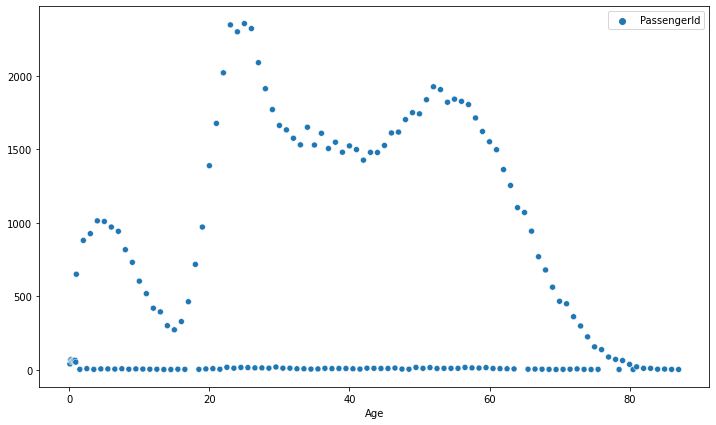

In [13]:
df_age = df['Age'].dropna().reset_index().groupby('Age').count()

plt.figure(figsize=(12,7))
sns.scatterplot(data = df_age)

As you see in the plot, there is a lot of dots in the bottom part of the plot as well as many dots around (0,0). The most likely reason behind these is that there are passengers with age represented not as a whole number, as well as some number of passengers with age from 0-1, that are grouped pretty much individually. In order to make our misualisation more consistent, let's round up the float numbers as well as set to 0 those that have the age between 0 and 1.

<AxesSubplot:title={'center':'Distribution of passenger_s age'}, xlabel='Age'>

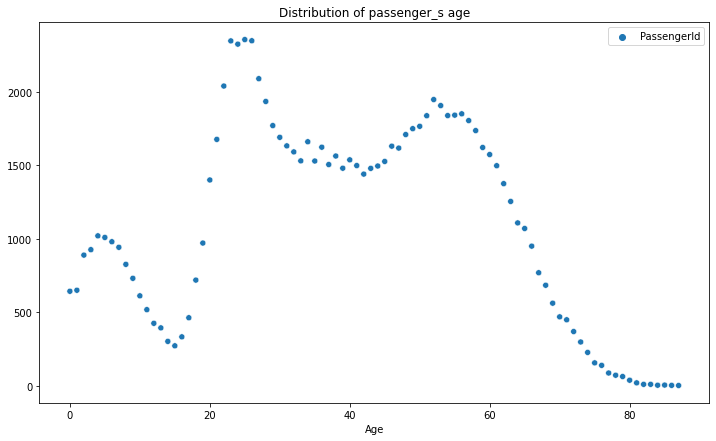

In [14]:
df.loc[df['Age'] < 1, 'Age'] = 0
df['Age'] = df['Age'].round(0)
df_rounded_age = df['Age'].dropna().reset_index().groupby('Age').count()
plt.figure(figsize=(12,7))
plt.title('Distribution of passenger_s age')
sns.scatterplot(data = df_rounded_age)

We can also use lineplot to make it more continuous.

<AxesSubplot:xlabel='Age'>

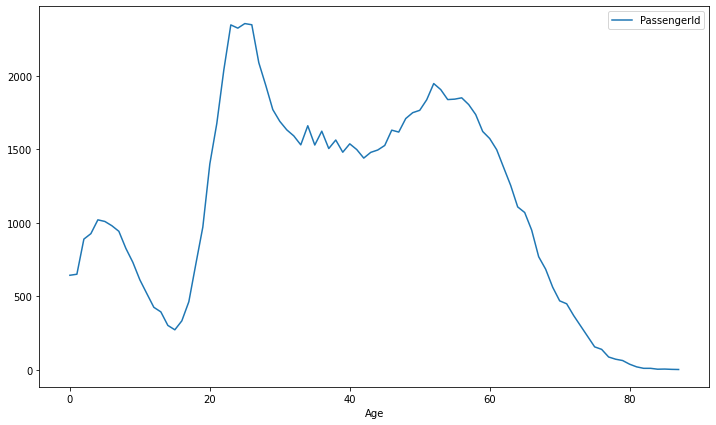

In [15]:
plt.figure(figsize=(12,7))
sns.lineplot(data=df_rounded_age)

## Fare/Class
During data quality check we have discovered that some simple values for Fare in 1st class are below Fare in class 2/3. Now that we have a mean value we can look a bit into that and visualise the average fare per each passenger class.

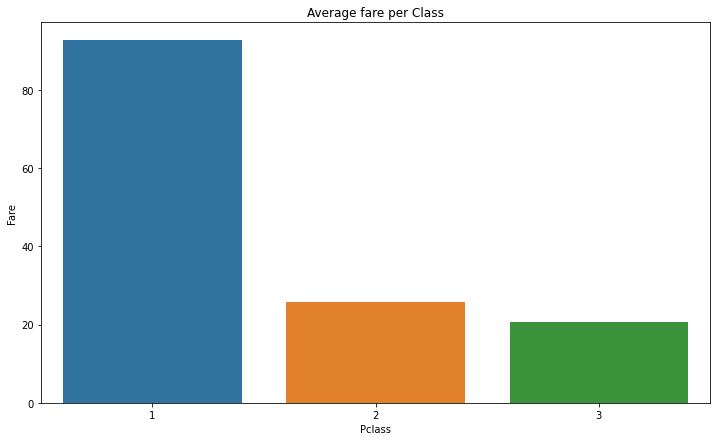

In [16]:
plass_fare_mean = df.groupby('Pclass').agg({'Fare':'mean'}).reset_index()

plt.figure(figsize=(12,7))
plt.title('Average fare per Class')
sns.barplot(x=plass_fare_mean['Pclass'], y=plass_fare_mean['Fare']);

We can say that in average 1st class is appr. 4 times more expensive than the 2nd/3rd, while the fare difference between 2nd and 3rd is not that large.

### Filling in missing values in **Fare** column
As we recall from data quality check, **Fare** is one of the columns that had a small proportion of NaNs. Relying on the fact that class and fare have direct relation, we can add missing values to the Fares column based on the corresponding class.

In [17]:
df.loc[(df['Pclass'] == 1) & (df['Fare'].isnull()), 'Fare'] = df[(df['Pclass'] == 1) & (df['Fare'].notnull())]['Fare'].mean()
df.loc[(df['Pclass'] == 1) & (df['Fare'].isnull()), 'Fare'] = df[(df['Pclass'] == 1) & (df['Fare'].notnull())]['Fare'].mean()
df.loc[(df['Pclass'] == 1) & (df['Fare'].isnull()), 'Fare'] = df[(df['Pclass'] == 1) & (df['Fare'].notnull())]['Fare'].mean()

## Sex
Let's see overall number of male and female passengers.

([<matplotlib.patches.Wedge at 0x7fcca84d0d10>,
 [Text(0.20998789545467864, 1.0797708478017523, 'Female'),
  Text(-0.20998789545467925, -1.0797708478017523, 'Male')],
 [Text(0.11453885206618833, 0.5889659169827739, '44%'),
  Text(-0.11453885206618866, -0.5889659169827739, '56%')])

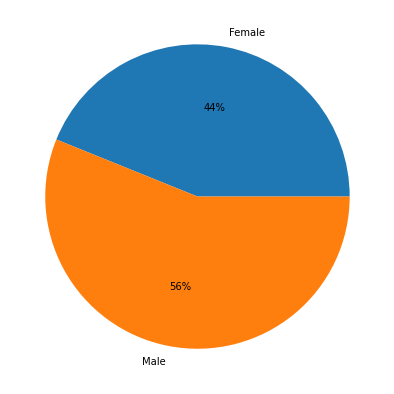

In [18]:
df_sex = df[['Sex']].groupby(['Sex']).size()

plt.figure(figsize=(12,7))
plt.pie(df_sex, labels = ['Female', 'Male'], autopct='%.0f%%')

As we see there are slightly more men than women in this dataset.

## Survivals

([<matplotlib.patches.Wedge at 0x7fcca84b6550>,
 [Text(-0.24757343728526857, 1.071777678975802, 'Not survived'),
  Text(0.24757353763233614, -1.0717776557962992, 'Survived')],
 [Text(-0.13504005670105557, 0.5846060067140737, '57%'),
  Text(0.1350401114358197, -0.5846059940707086, '43%')])

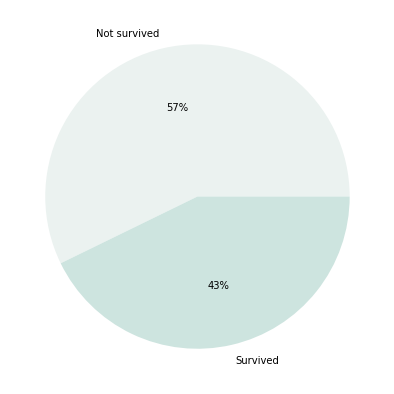

In [19]:
df_surv = df[['Survived']].groupby(['Survived']).size()

plt.figure(figsize=(12,7))
plt.pie(df_surv, labels = ['Not survived', 'Survived'], autopct = '%.0f%%', colors = sns.color_palette('light:#5A9')[0:2])

## Exploring relashionships
Looking into the pure data is not so interisting as finding correlations and dependencies :)

We will be analysing this dataset with the goal to find correlations and relashionships that impacted the survival rate and we will visualize them using different plots from Seaborn.

### Number of survived passengers per age

<AxesSubplot:ylabel='Age'>

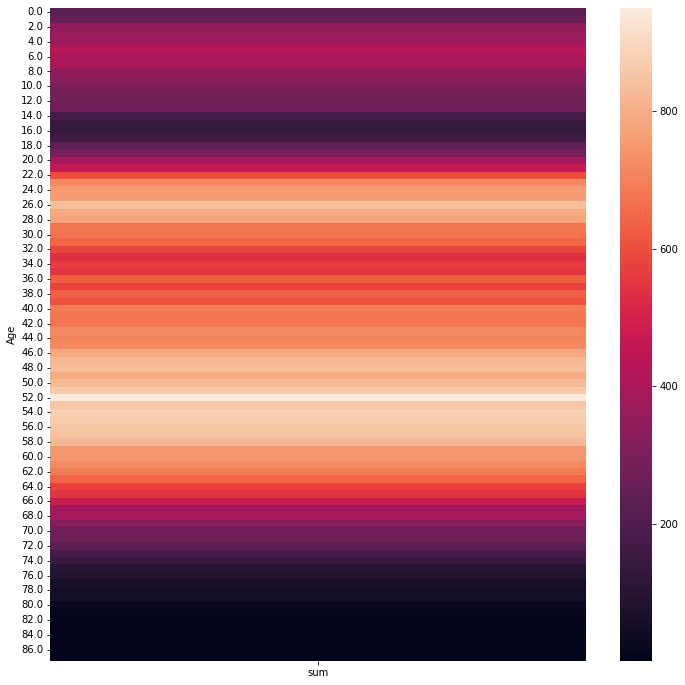

In [20]:
df_age_surv = df.groupby(['Age'])['Survived'].agg(['sum'])

plt.figure(figsize=(12,12))
sns.heatmap(df_age_surv)

This heatmap shows the age of the survived people, but let's also have a look on the survival rate is represented across all of the passengers.

<AxesSubplot:xlabel='Age', ylabel='Survived'>

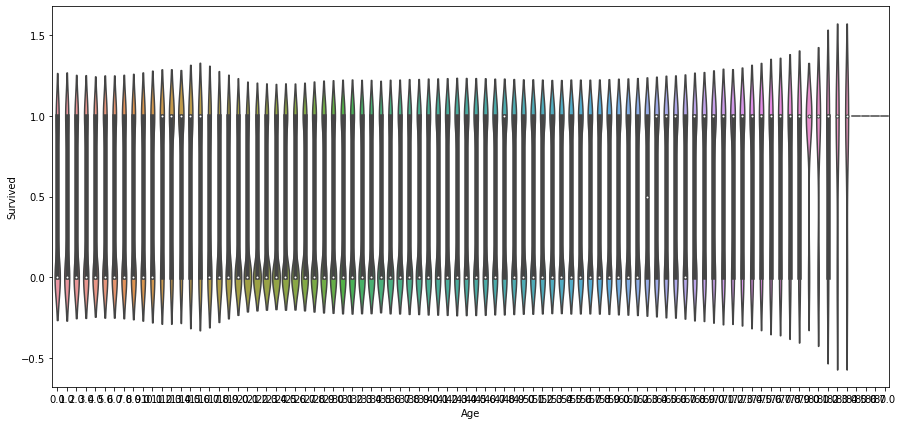

In [21]:
plt.figure(figsize=(15,7))

sns.violinplot(data = df, x = 'Age', y = 'Survived')

The violin plot above allows us to see the whole distribution of the survival rate across all of the ages, but since there are essentially passenger for each year between 0 and 87, it makes the graph a bit hard to read. 

A possible solution can be to group ages into broader categories, e.g., kids, adults and seniors, and then create a more readable plot for each of such categories.

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='Age group', ylabel='Survived'>

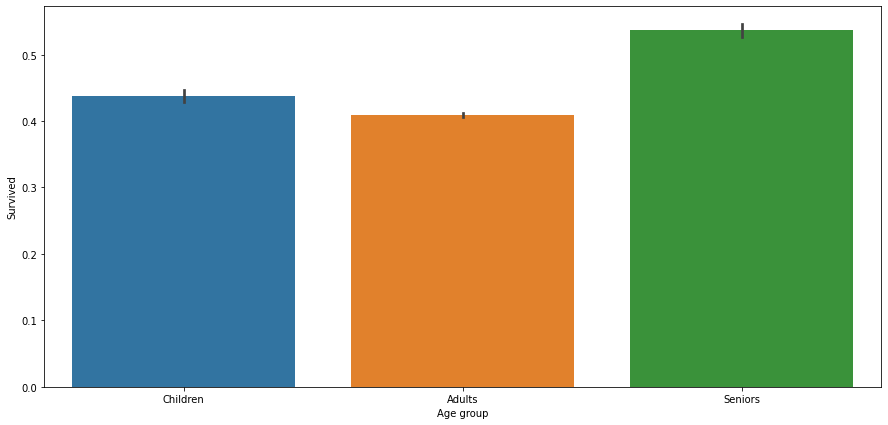

In [22]:
df['Age group'] = df.loc[:, 'Age']
df['Age group'].iloc[df['Age'] < 18] = "Children"
df['Age group'].iloc[(df['Age'] >= 18) & (df['Age'] <= 60)] = "Adults"
df['Age group'].iloc[df['Age'] > 60] = "Seniors"

plt.figure(figsize=(15,7))

sns.barplot(data = df, x = 'Age group', y = 'Survived')

Now, we can state that survival rate for Senior passengers is the highest among all ages, however if we recall a heatmap from above, the number of survived passengers in this age group is relatevely small, compared to adults.

## Survival rate per sex
Let's find out what is the relation between survival and sex of the passenger using a simple barplot.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

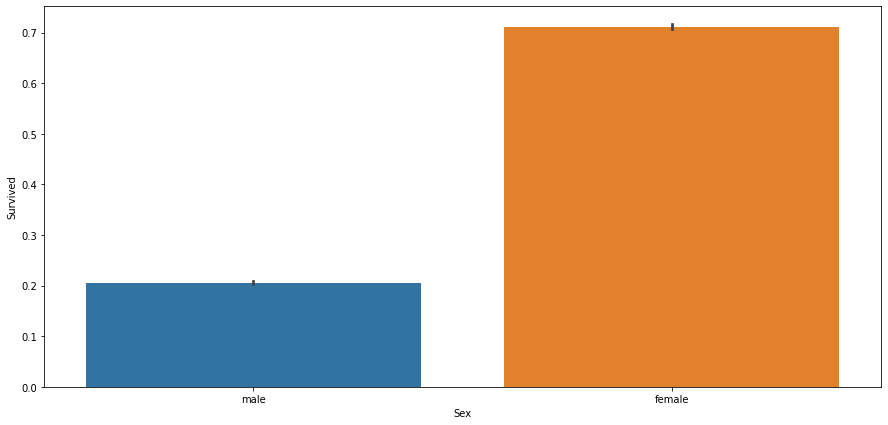

In [23]:
plt.figure(figsize=(15,7))

sns.barplot(data = df, x = 'Sex', y = 'Survived')

As we see in the plot above, the survival rate for women is much higher than fo male. It can be explained by a common rule, that during the evacuation women and childer, as well as seniors are prioritized. 

## Survival rate per Pclass
Let's see if getting a 1st class ticket would have increased the chances of survival using a barplot.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

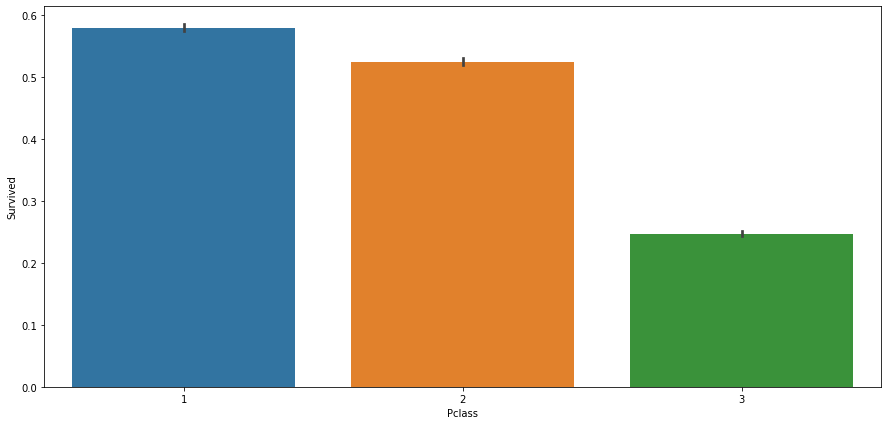

In [24]:
plt.figure(figsize=(15,7))

sns.barplot(data = df, x = 'Pclass', y = 'Survived')

The difference in survival rate between 1st class and 2nd class is not so significant, however chances of surviving with 3rd class tickets have been pretty low.

## Survival rate per class and sex
We saw that 1st and 2nd class ticket would increase passengers chances of survival as well as being women wouls also do that. But now let's check if a male passenger could have increased his chances for survival when buying a higher class ticket against women of any passenger class. For that we can use a poinplot diagram with hue.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

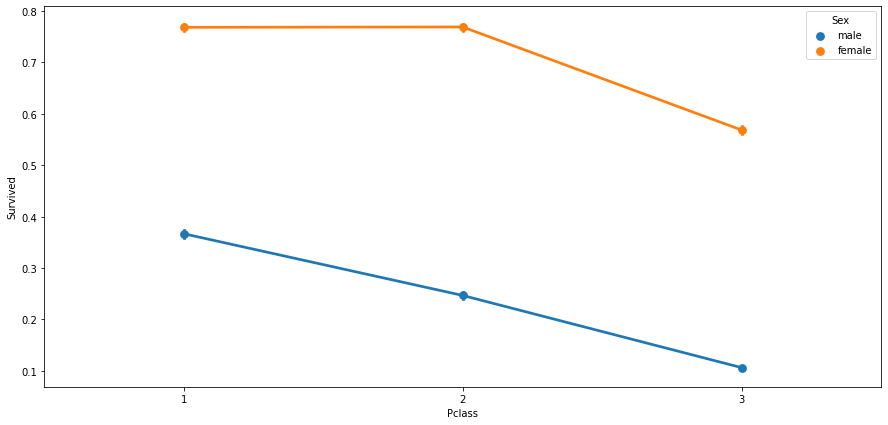

In [25]:
plt.figure(figsize=(15,7))

sns.pointplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex')

As shown in the plot above, being a man and having a higher class ticket would only increase chances of survival compared to other men with lower class tickets, but it still won't be high enough to overpass women with 3rd class ticket.

# Summary
Let's sum up some interesting findings that we ahve observed during the EDA of the given dataset:
* 43% of the passenger have survived
* Women have significantly higher survival rate than men, senior passengers and children have a higher survival rate than adults. Overall, the rule that women, children, and seniors are saved first is confirmed
* On average, paying extra money for 1st class significantly increases survival chances for men. For women, no significant difference between 1st and 2nd class survival rate, meaning that women could have saved some money
* The range for fare between 1st class and 2nd is much higher, than between 2nd and 3rd.